<a href="https://colab.research.google.com/github/fourfeatherz/DS2002F24/blob/main/Labs/Universities_and_Stock_API_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using API Calls in Python with JSON and DataFrames - University Data Example
In this notebook, we will make API requests to the Hipolabs Universities API, parse the JSON response, and convert it into Pandas DataFrames for analysis and visualization.

### Step 1: Making the API Call to Fetch University Data

In [168]:
import requests
import json
import pandas as pd

# API endpoint for fetching universities
url = "http://universities.hipolabs.com/search?country=United%20States"

# Make the GET request
response = requests.get(url)

# Check the status code
if response.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

API request successful!


### Step 2: Parsing the JSON Response

In [170]:
# Parse the JSON response
university_data = response.json()

# Pretty-print the first university
print(json.dumps(university_data[0], indent=2))

{
  "domains": [
    "marywood.edu"
  ],
  "alpha_two_code": "US",
  "web_pages": [
    "http://www.marywood.edu"
  ],
  "name": "Marywood University",
  "state-province": null,
  "country": "United States"
}


### Step 3: Converting the JSON Data to a DataFrame

In [172]:
# Convert JSON data to a DataFrame
df = pd.DataFrame(university_data)

# Display the first few rows of the DataFrame
print(df.head())
df

            domains alpha_two_code                     web_pages  \
0    [marywood.edu]             US     [http://www.marywood.edu]   
1  [lindenwood.edu]             US  [http://www.lindenwood.edu/]   
2    [sullivan.edu]             US       [https://sullivan.edu/]   
3        [fscj.edu]             US       [https://www.fscj.edu/]   
4      [xavier.edu]             US     [https://www.xavier.edu/]   

                                    name state-province        country  
0                    Marywood University           None  United States  
1                  Lindenwood University           None  United States  
2                    Sullivan University           None  United States  
3  Florida State College at Jacksonville           None  United States  
4                      Xavier University           None  United States  


,domains,alpha_two_code,web_pages,name,state-province,country
0,[marywood.edu],US,[http://www.marywood.edu],Marywood University,None,United States
1,[lindenwood.edu],US,[http://www.lindenwood.edu/],Lindenwood University,None,United States
2,[sullivan.edu],US,[https://sullivan.edu/],Sullivan University,None,United States
3,[fscj.edu],US,[https://www.fscj.edu/],Florida State College at Jacksonville,None,United States
4,[xavier.edu],US,[https://www.xavier.edu/],Xavier University,None,United States
...,...,...,...,...,...,...
2329,[vermontlaw.edu],US,[https://www.vermontlaw.edu/],Vermont Law School,None,United States
2330,[wnc.edu],US,[https://wnc.edu/],Western Nevada College,None,United States
2331,[westernu.edu],US,[https://www.westernu.edu/],Western University of Health Sciences,None,United States
2332,[stmarytx.edu],US,[https://www.stmarytx.edu/],St. Mary's University,Texas,United States


### Step 4: Basic Data Analysis

In [174]:
# Count the number of universities by state
state_counts = df['state-province'].value_counts()
print(state_counts)

state-province
Pennsylvania            31
NY                       9
California               5
Texas                    5
New York, NY             4
New York                 3
Florida                  3
North Carolina           3
Michigan                 3
Ohio                     3
Illinois                 2
CA                       2
Washington               2
GA                       2
TX                       2
ND                       1
Missouri                 1
Maine                    1
MA                       1
Georgia                  1
MI                       1
New Hampshire            1
Virginia                 1
South Carolina           1
IN                       1
Colorado                 1
Kansas                   1
Indiana                  1
VA                       1
Iowa                     1
NV                       1
Utah                     1
Salt Lake City, Utah     1
Name: count, dtype: int64


### Step 5: Data Visualization

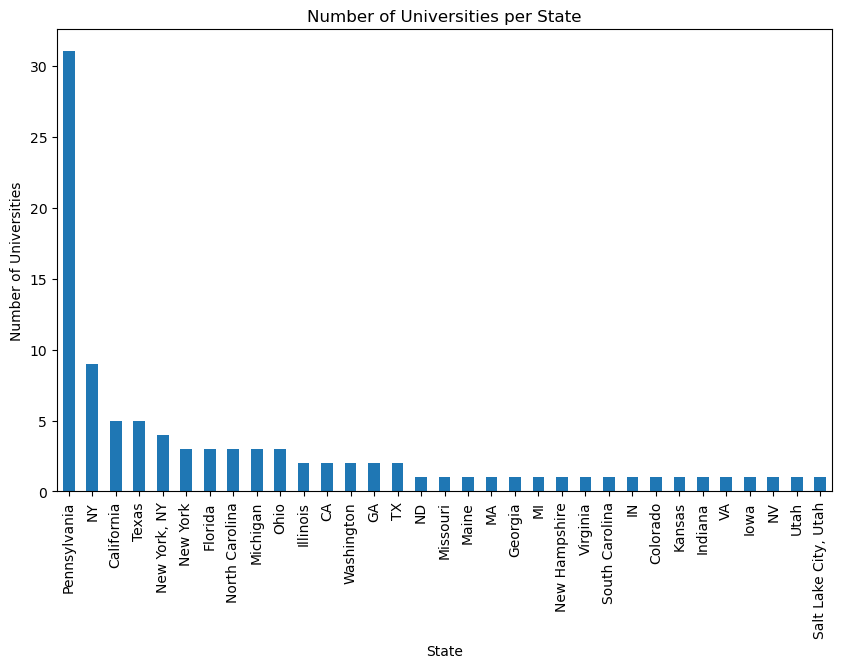

In [176]:
import matplotlib.pyplot as plt

# Plot the number of universities per state
state_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Universities per State")
plt.xlabel("State")
plt.ylabel("Number of Universities")
plt.show()

### Step 6: Extending to Multiple Countries

In [208]:
countries = ["United States", "Canada", "Australia", "United Kingdom"]
university_list = []

for country in countries:
    response = requests.get(f"http://universities.hipolabs.com/search?country={country}")
    data = response.json()

    for uni in data:
        uni['country'] = country
        university_list.append(uni)

# Convert to DataFrame
df_universities = pd.DataFrame(university_list)

# Display the first few rows
print(df_universities.head())

df_universities.head()

            domains alpha_two_code                     web_pages  \
0    [marywood.edu]             US     [http://www.marywood.edu]   
1  [lindenwood.edu]             US  [http://www.lindenwood.edu/]   
2    [sullivan.edu]             US       [https://sullivan.edu/]   
3        [fscj.edu]             US       [https://www.fscj.edu/]   
4      [xavier.edu]             US     [https://www.xavier.edu/]   

                                    name state-province        country  
0                    Marywood University           None  United States  
1                  Lindenwood University           None  United States  
2                    Sullivan University           None  United States  
3  Florida State College at Jacksonville           None  United States  
4                      Xavier University           None  United States  


,domains,alpha_two_code,web_pages,name,state-province,country
0,[marywood.edu],US,[http://www.marywood.edu],Marywood University,None,United States
1,[lindenwood.edu],US,[http://www.lindenwood.edu/],Lindenwood University,None,United States
2,[sullivan.edu],US,[https://sullivan.edu/],Sullivan University,None,United States
3,[fscj.edu],US,[https://www.fscj.edu/],Florida State College at Jacksonville,None,United States
4,[xavier.edu],US,[https://www.xavier.edu/],Xavier University,None,United States


### Step 7: Visualizing University Counts by Country

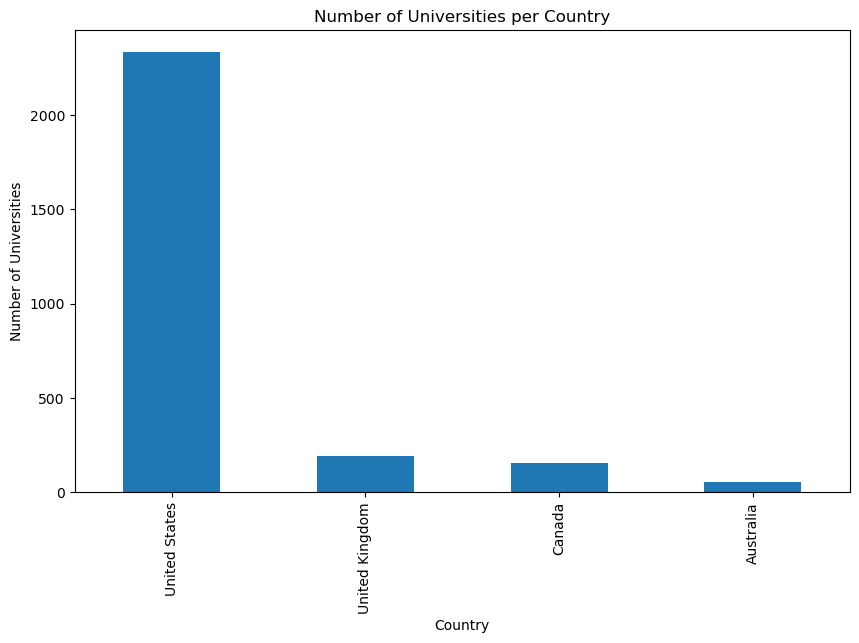

In [180]:
# Count the number of universities per country
country_counts = df_universities['country'].value_counts()

# Plot the data
country_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Universities per Country")
plt.xlabel("Country")
plt.ylabel("Number of Universities")
plt.show()

###Step 8: Customizing the Workshop

You can experiment further by:



*   Fetching data for specific regions.
*   Analyzing other attributes such as university domains.
*   Creating visualizations to compare universities in different regions.



In [220]:
#Fetching data for specific regions
North_America = ["United States", "Canada"]
university_list_NA = []

for country in North_America:
    response = requests.get(f"http://universities.hipolabs.com/search?country={country}")
    data = response.json()

    for uni in data:
        uni['country'] = country
        university_list_NA.append(uni)

df_universities_NA = pd.DataFrame(university_list_NA)

df_universities_NA


,domains,alpha_two_code,web_pages,name,state-province,country
0,[marywood.edu],US,[http://www.marywood.edu],Marywood University,None,United States
1,[lindenwood.edu],US,[http://www.lindenwood.edu/],Lindenwood University,None,United States
2,[sullivan.edu],US,[https://sullivan.edu/],Sullivan University,None,United States
3,[fscj.edu],US,[https://www.fscj.edu/],Florida State College at Jacksonville,None,United States
4,[xavier.edu],US,[https://www.xavier.edu/],Xavier University,None,United States
...,...,...,...,...,...,...
2484,[collegeuniversel.ca],CA,[https://collegeuniversel.ca/],Collège Universel Gatineau,Quebec,Canada
2485,[cambriancollege.ca],CA,[https://cambriancollege.ca/],Cambrian College,None,Canada
2486,[georgiancollege.ca],CA,[https://www.georgiancollege.ca/],Georgian College,Ontario,Canada
2487,[lethbridgecollege.ca],CA,[https://lethbridgecollege.ca/],Lethbridge College,Alberta,Canada


In [260]:
Oceania = "Australia"
university_list_O = []

response = requests.get(f"http://universities.hipolabs.com/search?country={Oceania}")
data = response.json()
for uni in data:
    uni['country'] = Oceania
    university_list_O.append(uni)

df_universities_O = pd.DataFrame(university_list_O)

df_universities_O



,domains,alpha_two_code,web_pages,name,state-province,country
0,[acs.edu.au],AU,[http://www.acs.edu.au/],Australian Correspondence Schools,None,Australia
1,[acu.edu.au],AU,[http://www.acu.edu.au/],Australian Catholic University,New South Wales,Australia
2,[adelaide.edu.au],AU,[http://www.adelaide.edu.au/],University of Adelaide,South Australia,Australia
3,[adfa.oz.au],AU,[http://www.adfa.oz.au/],Australian Defence Force Academy,Australian Capital Territory,Australia
4,[alc.edu.au],AU,[http://www.alc.edu.au/],Australian Lutheran College,South Australia,Australia
5,[amc.edu.au],AU,[http://www.amc.edu.au/],Australian Maritime College,Tasmania,Australia
6,[anu.edu.au],AU,[http://www.anu.edu.au/],Australian National University,Australian Capital Territory,Australia
7,[avondale.edu.au],AU,[http://www.avondale.edu.au/],Avondale University,New South Wales,Australia
8,[federation.edu.au],AU,[http://federation.edu.au/],Federation University Australia,Victoria,Australia
9,[bond.edu.au],AU,[http://www.bond.edu.au/],Bond University,Queensland,Australia


In [262]:
Europe = "United Kingdom"
university_list_E = []

response = requests.get(f"http://universities.hipolabs.com/search?country={Europe}")
data = response.json()
for uni in data:
    uni['country'] = Europe
    university_list_E.append(uni)

df_universities_E = pd.DataFrame(university_list_E)

df_universities_E

,state-province,alpha_two_code,web_pages,name,domains,country
0,None,GB,[https://westherts.ac.uk],West Herts College,"[student.westherts.ac.uk, westherts.ac.uk]",United Kingdom
1,None,GB,[https://rhul.ac.uk],Royal Holloway University of London,[rhul.ac.uk],United Kingdom
2,None,GB,"[http://www.port.ac.uk/, https://myport.port.a...",University of Portsmouth,"[port.ac.uk, myport.ac.uk, myport.port.ac.uk]",United Kingdom
3,None,GB,[https://futureworks.ac.uk/],Futureworks,[futureworks.ac.uk],United Kingdom
4,None,GB,[https://www.arts.ac.uk],University of the Arts London,[arts.ac.uk],United Kingdom
...,...,...,...,...,...,...
184,None,GB,[https://www.wsc.ac.uk/],West Suffolk College,[wsc.ac.uk],United Kingdom
185,None,GB,[https://college.harlaxton.co.uk/],Harlaxton College,[college.harlaxton.co.uk],United Kingdom
186,None,GB,[https://www.newcollege.ac.uk/],New College Swindon,[newcollege.ac.uk],United Kingdom
187,None,GB,[https://www.cumbria.ac.uk/],University of Cumbria,[cumbria.ac.uk],United Kingdom


For the followig you will need to get your API key from  https://financeapi.net/
Examine the demo page and sample data to be returned

In [19]:
import json
import pandas as pd
import json
import requests

In [102]:
#get stock from the user
stocks=input().split(",")

 AAPL,^RUT,CL=F,GC=F


In [104]:
print(f"The Stock we will research is: {stocks}")

The Stock we will research is: ['AAPL', '^RUT', 'CL=F', 'GC=F']


In [110]:
apikey="i_copied_and_pasted_my_key_here"

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stocks}
#{'symbols': ['AAPL', '^RUT', 'CL=F', 'GC=F']}

headers = {
    'x-api-key': apikey
    }
for stock in querystring['symbols']:
    response = requests.request("GET", url, headers=headers, params={"symbols":stock})
    print(response.text)

{"quoteResponse":{"result":[{"language":"en-US","region":"US","quoteType":"EQUITY","typeDisp":"Equity","quoteSourceName":"Nasdaq Real Time Price","triggerable":true,"customPriceAlertConfidence":"HIGH","currency":"USD","postMarketPrice":228.066,"postMarketChange":0.54599,"regularMarketChange":1.1500092,"regularMarketTime":1727380801,"regularMarketDayHigh":228.5,"regularMarketDayRange":"225.41 - 228.5","regularMarketDayLow":225.41,"regularMarketVolume":36490267,"regularMarketPreviousClose":226.37,"bid":227.37,"ask":238.68,"bidSize":1,"askSize":1,"fullExchangeName":"NasdaqGS","financialCurrency":"USD","regularMarketOpen":227.3,"averageDailyVolume3Month":55790612,"averageDailyVolume10Day":76429910,"fiftyTwoWeekLowChange":63.440002,"fiftyTwoWeekLowChangePercent":0.38664067,"fiftyTwoWeekRange":"164.08 - 237.23","fiftyTwoWeekHighChange":-9.709991,"fiftyTwoWeekHighChangePercent":-0.040930707,"fiftyTwoWeekLow":164.08,"fiftyTwoWeekHigh":237.23,"fiftyTwoWeekChangePercent":32.620537,"dividendDate"

In [126]:
#print the company name and price
for stock in querystring['symbols']:
    response = requests.request("GET", url, headers=headers, params={"symbols":stock})
    stock_json = response.json()
    print(stock_json['quoteResponse']['result'][0]["shortName"] + " Price:$" + str(stock_json['quoteResponse']['result'][0]["regularMarketPrice"]))

Apple Inc. Price:$227.52
Russell 2000 Price:$2209.8713
Crude Oil Nov 24 Price:$67.08
Gold Dec 24 Price:$2692.0


Ask the user for a list of stocks and pass that answer back to the user
